<a href="https://colab.research.google.com/github/TomasKricka/MPA-MLF/blob/main/projekt_1/class_wireless_trans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD, RMSprop, Adamax, Adagrad, Ftrl

from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from keras.backend import clear_session

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
path_to_x_test = 'drive/MyDrive/MLF/projekt 1/x_test.csv' 
pd_x_test = pd.read_csv(path_to_x_test)

path_to_x_train = 'drive/MyDrive/MLF/projekt 1/x_train.csv' 
pd_x_train = pd.read_csv(path_to_x_train)

path_to_y_train = 'drive/MyDrive/MLF/projekt 1/y_train.csv' 
pd_y_train = pd.read_csv(path_to_y_train)

clasess = 8

In [52]:
x_train = pd_x_train.drop("Unnamed: 0", axis = 1)
x_train = x_train.drop("m_power", axis = 1)
x_train = x_train.drop("Tosc", axis = 1)
x_train_cols = x_train.drop("Tmix", axis = 1)


x_test = pd_x_test.drop("Unnamed: 0", axis = 1)
x_test = x_test.drop("m_power", axis = 1)
x_test = x_test.drop("Tosc", axis = 1)
x_test = x_test.drop("Tmix", axis = 1)
x_test_pred = x_test

x_train, x_test, y_train, y_test = train_test_split(x_train_cols,pd_y_train, test_size=0.2)

y_train = y_train.drop("id", axis = 1)
y_test = y_test.drop("id", axis = 1)

###Data preprocessing###

In [53]:
x_train_scaled = abs((x_train-x_train.min())/(x_train.max()-x_train.min()))

y_train = y_train - 1

y_train_encoded = to_categorical(y_train, num_classes=clasess)

###Model building###

In [54]:
model = Sequential()
model.add(Flatten(input_shape=(clasess, 1)))      
model.add(Dense(64, activation='relu'))
#model.add(Dense(256, activation='sigmoid'))
model.add(Dense(clasess, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 8)                 0         
                                                                 
 dense_6 (Dense)             (None, 64)                576       
                                                                 
 dense_7 (Dense)             (None, 8)                 520       
                                                                 
Total params: 1,096
Trainable params: 1,096
Non-trainable params: 0
_________________________________________________________________


In [55]:
optimizer = SGD(learning_rate = 0.15)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

###Model trainnig###

In [56]:
history = model.fit(x_train_scaled, y_train_encoded, epochs=30, batch_size=32, validation_split = 0.2)


Epoch 1/30
308/308 [==============================] - 2s 4ms/step - loss: 1.1341 - accuracy: 0.7209 - val_loss: 0.5811 - val_accuracy: 0.8609
Epoch 2/30
308/308 [==============================] - 1s 2ms/step - loss: 0.3926 - accuracy: 0.9525 - val_loss: 0.2916 - val_accuracy: 0.9557
Epoch 3/30
308/308 [==============================] - 1s 2ms/step - loss: 0.2214 - accuracy: 0.9747 - val_loss: 0.1825 - val_accuracy: 0.9837
Epoch 4/30
308/308 [==============================] - 1s 2ms/step - loss: 0.1514 - accuracy: 0.9819 - val_loss: 0.1310 - val_accuracy: 0.9841
Epoch 5/30
308/308 [==============================] - 1s 2ms/step - loss: 0.1145 - accuracy: 0.9866 - val_loss: 0.1061 - val_accuracy: 0.9744
Epoch 6/30
308/308 [==============================] - 1s 2ms/step - loss: 0.0926 - accuracy: 0.9885 - val_loss: 0.0778 - val_accuracy: 0.9910
Epoch 7/30
308/308 [==============================] - 1s 2ms/step - loss: 0.0770 - accuracy: 0.9913 - val_loss: 0.0649 - val_accuracy: 0.9955
Epoch 

In [57]:
x_test_scaled = abs((x_test-x_test.min())/(x_test.max()-x_test.min()))
y_test = y_test - 1
y_test_encoded = to_categorical(y_test, num_classes=clasess)

score = model.evaluate(x_test_scaled, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')
print(y_test_encoded.shape)

Test loss: 1.9533076286315918
Test accuracy: 85.38411259651184 %
(3072, 8)


In [58]:
print(y_test.shape)
print(y_train.shape)
print(x_test_scaled.shape)
print(y_test_encoded.shape)
print(x_test.shape)

print(x_test_pred.shape)
x_test_pred_scaled = abs((x_test_pred-x_test_pred.min())/(x_test_pred.max()-x_test_pred.min()))


(3072, 1)
(12288, 1)
(3072, 8)
(3072, 8)
(3072, 8)
(3840, 8)


120/120 [==============================] - 0s 1ms/step
(3840, 8)
[[4]
 [7]
 [4]
 ...
 [1]
 [2]
 [0]]
3840


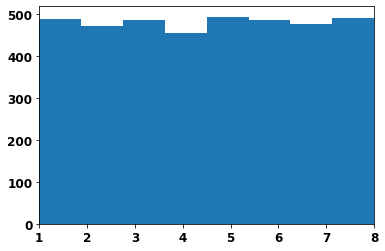

In [59]:
pred_val = model.predict([x_test_pred_scaled])
#pred_val = model.predict(x_test)
#pred_val = model.predict([x_test_scaled])
print(pred_val.shape)
df = pd.DataFrame(pred_val)

row_numb = df.shape[0]

pred_numbs = np.argmax(pred_val, axis=1)
pred_numbs_res = pred_numbs.reshape ((row_numb,1))
print(pred_numbs_res)

print(row_numb)

pred_numbs_res = pred_numbs_res + 1
pred_numbs = pred_numbs + 1

df = pd.DataFrame(pred_numbs_res)
df.columns = ["target"]
df.to_csv('filename.csv') 
#files.download('filename.csv')

plt.figure()
plt.hist(pred_numbs_res, bins=8)
plt.xlim([1,8])
plt.show()



In [60]:
files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
print(pred_numbs_res)
print(pred_val)

df = pd.DataFrame(pred_val)
df.to_csv('pred_val.csv') 
#files.download('pred_val.csv')

[[7]
 [6]
 [7]
 ...
 [7]
 [7]
 [7]]
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  9.9999994e-01 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.9999994e-01
  1.4274074e-26 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  9.9999994e-01 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  9.9999994e-01 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  9.9999994e-01 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  9.9999994e-01 0.0000000e+00]]


In [13]:
#pred_numbs = pred_numbs + 1
count = pd.Series(pred_numbs).value_counts()

#print('0', count[0])

#print('1', count[1])
#print('2', count[2])
print('3', count[3])
#print('4', count[4])
print('5', count[5])
print('6', count[6])
print('7', count[7])
#print('8', count[8])

print(pred_numbs_res)



#files.download('filename.csv')

3 22
5 419
6 202
7 2418
[[7]
 [6]
 [7]
 ...
 [7]
 [7]
 [7]]


In [14]:
print(history)

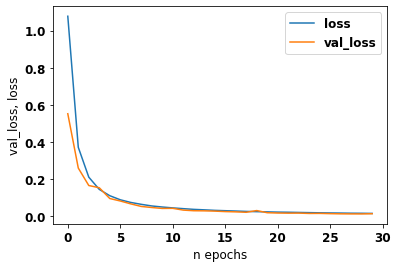

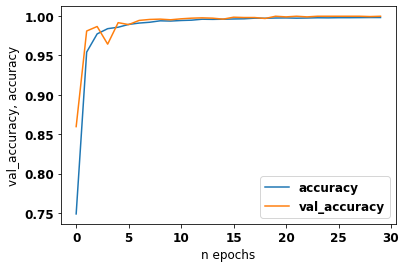

In [15]:
plt.figure()
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend(loc="upper right")
plt.xlabel('n epochs')
plt.ylabel('val_loss, loss')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend(loc="lower right")
plt.xlabel('n epochs')
plt.ylabel('val_accuracy, accuracy')
plt.show()